# Naive Bayes Classification on Covid Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
df = pd.read_csv('covid.csv')
print(df.head())

  fever cough breathing_difficulty fatigue sore_throat body_ache infected
0   Yes   Yes                  Yes     Yes         Yes       Yes      Yes
1    No    No                   No      No          No        No       No
2   Yes   Yes                   No     Yes          No       Yes      Yes
3    No   Yes                   No      No         Yes        No       No
4   Yes    No                  Yes     Yes         Yes       Yes      Yes


In [4]:
# Preprocessing: Encode Categorical Variables
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col].astype(str))

print("\nEncoded Data:")
print(df.head())


Encoded Data:
   fever  cough  breathing_difficulty  fatigue  sore_throat  body_ache  \
0      1      1                     1        1            1          2   
1      0      0                     0        0            0          0   
2      1      1                     0        1            0          2   
3      0      1                     0        0            1          0   
4      1      0                     1        1            1          2   

   infected  
0         1  
1         0  
2         1  
3         0  
4         1  


In [5]:
# Split Data
X = df.drop('infected', axis=1)
y = df['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [7]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Confusion Matrix:
 [[2 1]
 [0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



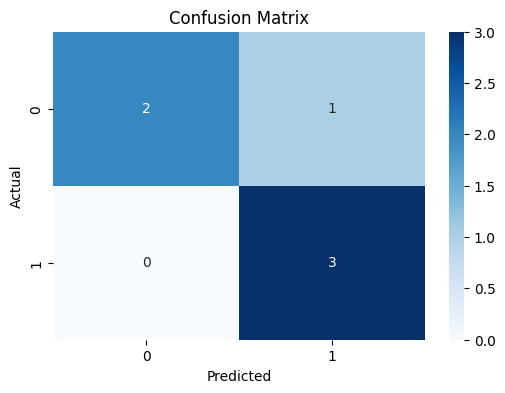

In [8]:
# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()